In [52]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import models,layers,Sequential,preprocessing
from tensorflow.keras.layers import Conv2D,experimental,MaxPool2D,Flatten,Dense,InputLayer,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as df

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32

In [69]:
imageGenerator=ImageDataGenerator(
    rescale=1/255,
    rotation_range=10,
    horizontal_flip=True,
)

In [83]:
training=imageGenerator.flow_from_directory("./Plant_Village/train/",
                                            batch_size=BATCH_SIZE,
                                            shuffle=True,
                                            target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                            class_mode="sparse"
                                           )

Found 2010 images belonging to 3 classes.


In [71]:
test=imageGenerator.flow_from_directory("./Plant_Village/test/",
                                        class_mode="sparse",
                                        batch_size=BATCH_SIZE,
                                        shuffle=False,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE))

Found 142 images belonging to 3 classes.


In [78]:
len(test.class_indices)

3

In [105]:
classNames=list(test.class_indices.keys())
classNames

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [84]:
INPUT_SHAPE=(IMAGE_SIZE,IMAGE_SIZE,len(test.class_indices))
model=Sequential([
    Conv2D(32,(3,3),activation="relu",input_shape=INPUT_SHAPE),
    MaxPool2D(pool_size=(3,3)),
    Conv2D(64,(3,3),activation="relu"),
    MaxPool2D(pool_size=(3,3)),
    Conv2D(64,(3,3),activation="relu"),
    MaxPool2D(pool_size=(3,3)),
    Conv2D(64,(3,3),activation="relu"),
    MaxPool2D(pool_size=(3,3)),
    Flatten(),
    Dense(32,activation="relu"),
    Dense(32,activation="relu"),
    Dense(len(test.class_indices),activation="sigmoid"),
])

In [85]:
model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=["accuracy"])
earlyStopping=EarlyStopping(monitor="val_loss",patience=2)
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_61 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 84, 84, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_62 (Conv2D)          (None, 82, 82, 64)        18496     
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 27, 27, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_63 (Conv2D)          (None, 25, 25, 64)        36928     
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 8, 8, 64)       

In [86]:
result=model.fit(training,batch_size=32,
                 epochs=5,callbacks=[earlyStopping],validation_data=test)

# history = model.fit(
#     training,
#     steps_per_epoch=47,
#     batch_size=32,
#     validation_steps=6,
#     verbose=1,
#     epochs=20,
# )

Epoch 1/5
63/63 [==============================] - 96s 1s/step - loss: 0.8521 - accuracy: 0.5537
Epoch 2/5
63/63 [==============================] - 99s 2s/step - loss: 0.6345 - accuracy: 0.7368
Epoch 3/5
63/63 [==============================] - 94s 1s/step - loss: 0.4625 - accuracy: 0.8109
Epoch 4/5
63/63 [==============================] - 102s 2s/step - loss: 0.2335 - accuracy: 0.9124
Epoch 5/5
63/63 [==============================] - 105s 2s/step - loss: 0.1829 - accuracy: 0.9323


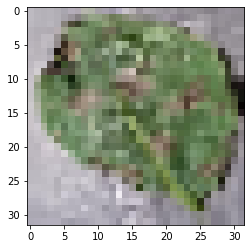

In [112]:
for image,label in training:
    plt.imshow(image[0])
    break

In [87]:
model.evaluate(test)

5/5 [==============================] - 4s 798ms/step - loss: 0.0945 - accuracy: 0.9648


[0.09445597976446152, 0.9647887349128723]

In [88]:
result_df=df.DataFrame(result.history)

<AxesSubplot:>

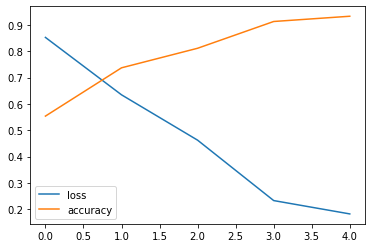

In [89]:
result_df.plot()

In [90]:
predictions=model.predict(test)
predictions

array([[9.90368903e-01, 6.13464892e-01, 6.59577549e-02],
       [9.61509228e-01, 7.20063031e-01, 6.74804151e-02],
       [9.97019589e-01, 6.86184764e-01, 2.24716961e-02],
       [9.99299765e-01, 7.17926204e-01, 9.56630707e-03],
       [9.36486185e-01, 8.18020761e-01, 5.33282161e-02],
       [8.72441947e-01, 6.01930916e-01, 2.43314594e-01],
       [9.99953866e-01, 8.19529712e-01, 1.18520856e-03],
       [8.48810017e-01, 6.07894778e-01, 1.58443302e-01],
       [9.86174166e-01, 9.75453258e-01, 2.52950191e-03],
       [8.28300834e-01, 7.78248310e-01, 7.85999000e-02],
       [9.99812245e-01, 7.91117489e-01, 2.64507532e-03],
       [9.99064326e-01, 9.04169977e-01, 4.25267220e-03],
       [9.98276711e-01, 6.68891728e-01, 1.59866512e-02],
       [9.95938778e-01, 8.41516018e-01, 8.58610868e-03],
       [9.99958217e-01, 8.06480348e-01, 1.13007426e-03],
       [9.80501890e-01, 9.18348193e-01, 1.30802095e-02],
       [9.97201324e-01, 6.34705782e-01, 3.06690633e-02],
       [9.99994278e-01, 8.12166

In [106]:
def getPredictions(image):
    img=image.reshape(-1,256,256,3)
    prediction=model.predict(img)
    perc=np.round(prediction.max()*100,2)
    perdictedValue=classNames[prediction.argmax()]
    return perdictedValue,perc;
    

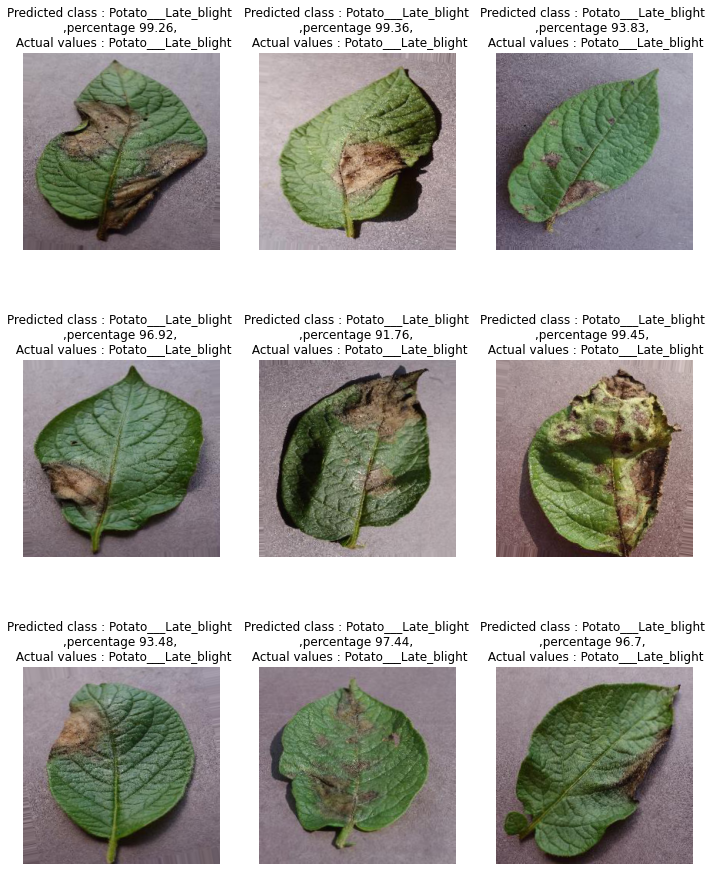

In [110]:
plt.figure(figsize=(12,16))
for image,label in test: #first batch
    for i in range(9): #only 9 from first batch
        plt.subplot(3,3,i+1)
        predictedValue,perc=getPredictions(image[i])
        plt.title(f"Predicted class : {predictedValue} \n,percentage {perc}, \n Actual values : {classNames[int(label[i])]}")    
        plt.imshow(image[i])
        plt.axis("off")
    break

In [93]:
version=1.1
model.save(f"./model/version_{version}",save_format="h5")

In [94]:
loadedModel=tf.keras.models.load_model("./model/version_1.0")

In [95]:
loadedModel.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_12 (Sequential)  (None, 256, 256, 3)       0         
                                                                 
 sequential_13 (Sequential)  (None, 256, 256, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 84, 84, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 82, 82, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 27, 27, 64)       0         
 2D)                                                 